# Violin Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('data/data.csv')

<ipython-input-2-e9bba6ebf1b5>:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/data.csv')


In [30]:
variables = ['CUHI_day_summer', 'CUHI_night_summer', 
             'SUHI_day_summer', 'SUHI_night_summer', 
             'DEM_urb_CT', 'Median Income',
             'ESABuilt_Area', 'ESAGrass_Area', 'ESATree_Area', 
             'Albedo_Built', 'Albedo_Grass', 'Albedo_Tree']

## Overall

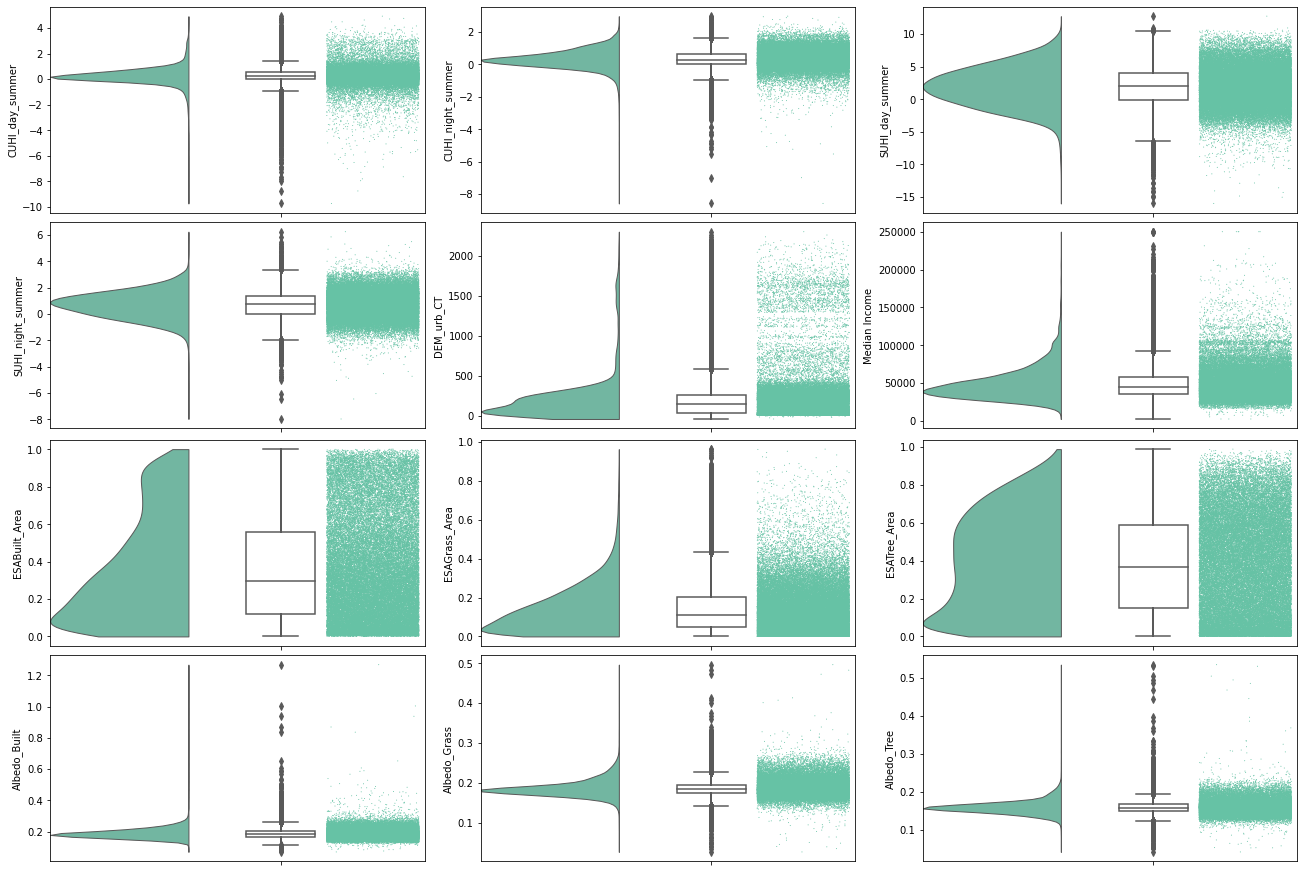

In [42]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,12), constrained_layout=True)
for k, ax in enumerate(axes.flatten()):
    ax=pt.RainCloud(y = variables[k], data = data, palette = pal, bw = sigma,
                    width_viol = .6, ax = ax, orient = 'v', move = .2, point_size = 1)
plt.savefig('graphs/violin/descriptive/overall_violin.png', bbox_inches='tight', dpi=720)

## By Climate Zone

In [43]:
def grouped_raincloud(dx, dy, ort='v', pal='Set2', sigma=.2, nrows=2, ncols=2, figsize=(8, 6), filename=''):
    #moving the rain below the boxplot
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
    for k, ax in enumerate(axes.flatten()):
        ax=pt.RainCloud(x = dx, y = dy[k], data = data, palette = pal, bw = sigma,
                        width_viol = .6, ax = ax, orient = ort, move = .2, point_size = 1)
    plt.savefig(filename, bbox_inches='tight', dpi=720)

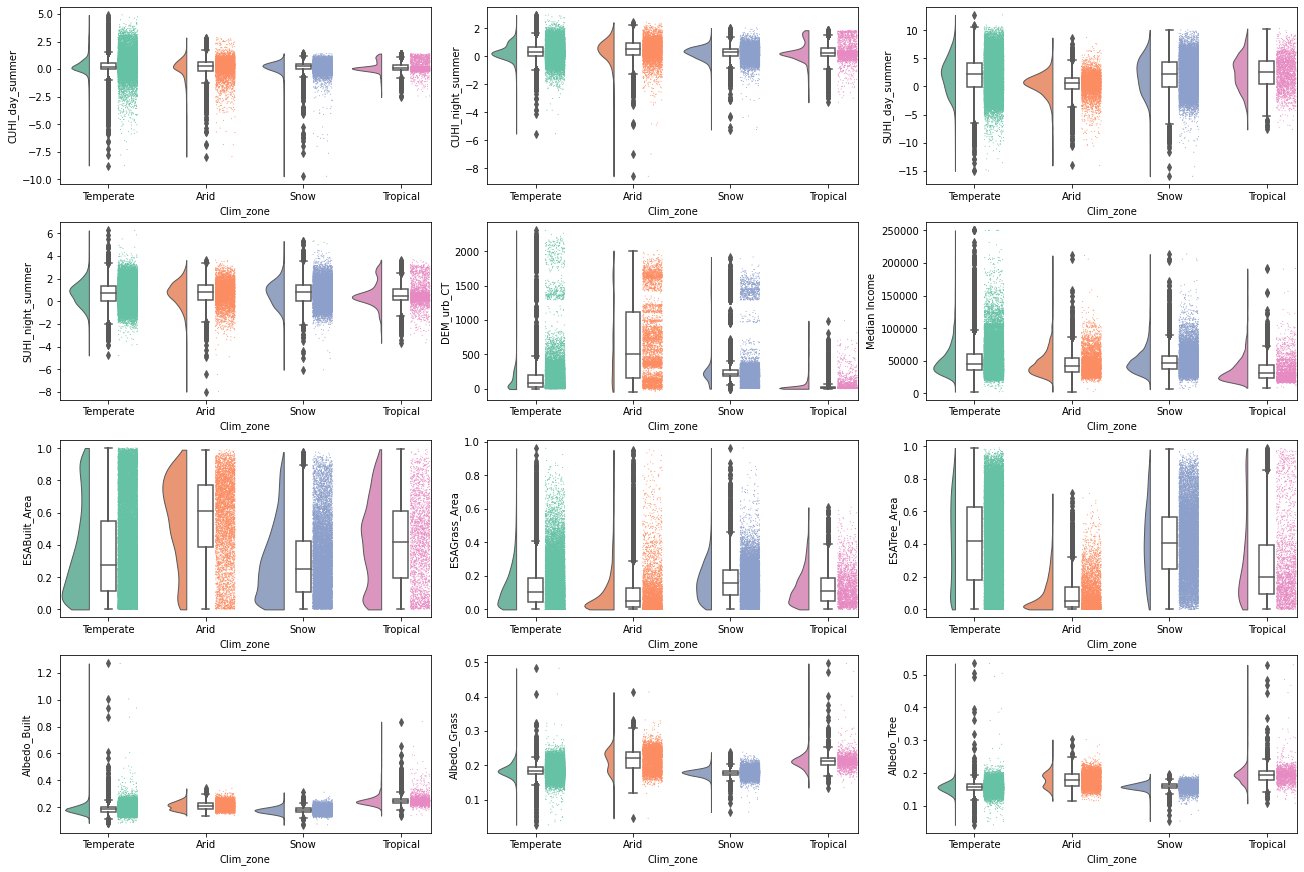

In [44]:
fname = 'graphs/violin/descriptive/clim_zone.png'
grouped_raincloud(dx = "Clim_zone", dy = variables, nrows=4,ncols=3, figsize=(18,12), filename=fname)

## By Coastal

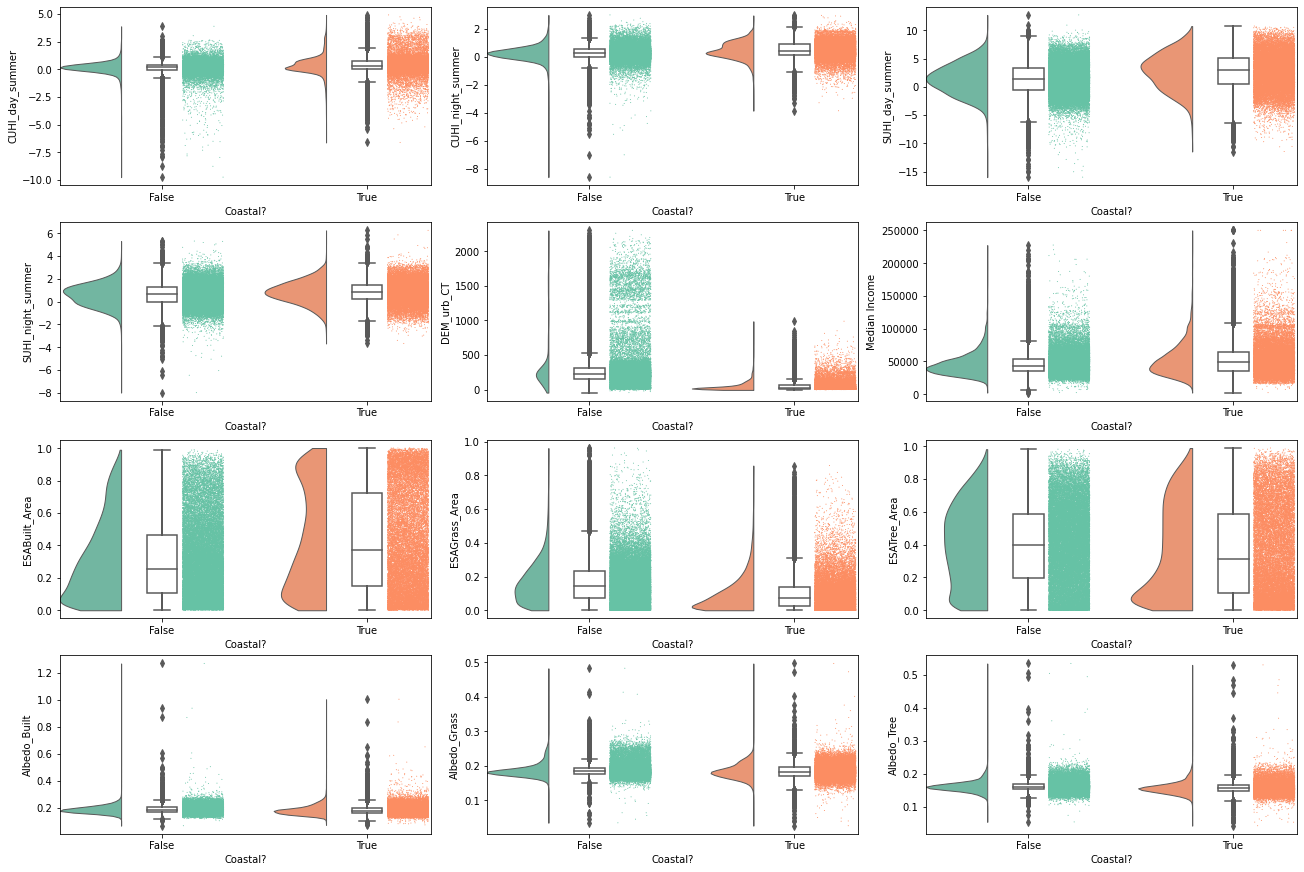

In [45]:
fname = 'graphs/violin/descriptive/coastal.png'
grouped_raincloud(dx = "Coastal?", dy = variables, nrows=4,ncols=3, figsize=(18,12), filename=fname)

## By Climate Zone and Coastal

In [46]:
def grouped_raincloud_hue(dx, dy, dhue, ort='v', pal='Set2', sigma=.2, nrows=4, ncols=3, figsize=(8, 6), filename=''):
    #moving the rain below the boxplot
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
    for k, ax in enumerate(axes.flatten()):
        ax=pt.RainCloud(x = dx, y = dy[k], hue=dhue, data = data, palette = pal, bw = sigma,
                        width_viol = .6, ax = ax, orient = ort, move = .2, point_size = 3, alpha=0.65, dodge=True)
        if k != (nrows * ncols - 1):
            ax.legend().set_visible(False)
    plt.savefig(filename, bbox_inches='tight', dpi=720)

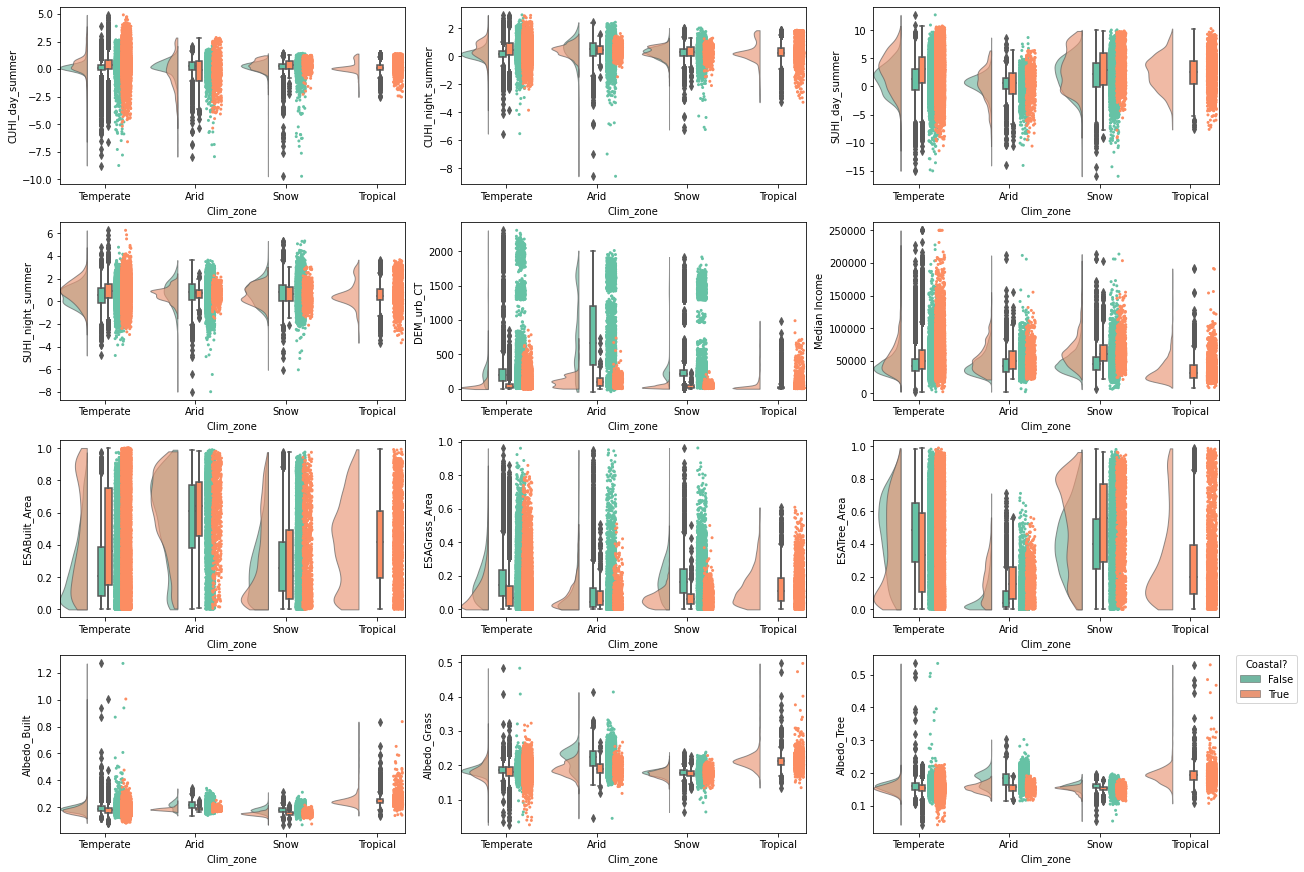

In [47]:
fname = 'graphs/violin/descriptive/clim_zone_coastal.png'
grouped_raincloud_hue(dx = "Clim_zone", 
                      dy = variables, 
                      dhue='Coastal?', figsize=(18,12), filename=fname)